In [10]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from requests import get
from urllib.parse import urlparse

In [11]:
import os
from requests import get
from urllib.parse import urlparse

def cache_data(src:str, dest:str) -> str:
    """Downloads and caches a remote file locally.
    
    The function sits between the 'read' step of a pandas or geopandas
    data frame and downloading the file from a remote location. The idea
    is that it will save it locally so that you don't need to remember to
    do so yourself. Subsequent re-reads of the file will return instantly
    rather than downloading the entire file for a second or n-th itme.
    
    Parameters
    ----------
    src : str
        The remote *source* for the file, any valid URL should work.
    dest : str
        The *destination* location to save the downloaded file.
        
    Returns
    -------
    str
        A string representing the local location of the file.
    """
    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    
    # Check if dest+filename does *not* exist -- 
    # that would mean we have to download it!
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")

        # Convert the path back into a list (without)
        # the filename -- we need to check that directories
        # exist first.
        path = os.path.split(dest)
        
        # Create any missing directories in dest(ination) path
        # -- os.path.join is the reverse of split (as you saw above)
        # but it doesn't work with lists... so I had to google how
        # to use the 'splat' operator! os.makedirs creates missing
        # directories in a path automatically.
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
            
        # Download and write the file
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print('Done downloading...')

    else:
        print(f"Found {dfn} locally!")

    return dfn

In [12]:
ddir  = os.path.join('data','geo') # destination directory
spath = 'https://github.com/jreades/i2p/blob/master/data/src/' # source path

boros = gpd.read_file( cache_data(spath+'Boroughs.gpkg?raw=true', ddir) )
water = gpd.read_file( cache_data(spath+'Water.gpkg?raw=true', ddir) )
green = gpd.read_file( cache_data(spath+'Greenspace.gpkg?raw=true', ddir) )
lsoas = gpd.read_file( cache_data(spath+'LSOAs.gpkg?raw=true', ddir) )

print('Done.')

Found data/geo/Boroughs.gpkg locally!
Found data/geo/Water.gpkg locally!
Found data/geo/Greenspace.gpkg locally!
Found data/geo/LSOAs.gpkg locally!
Done.


In [13]:
for g in [boros,water,green, lsoas]:
    print(g.crs)

epsg:27700
epsg:27700
epsg:27700
epsg:27700


(155000.0, 202000.0)

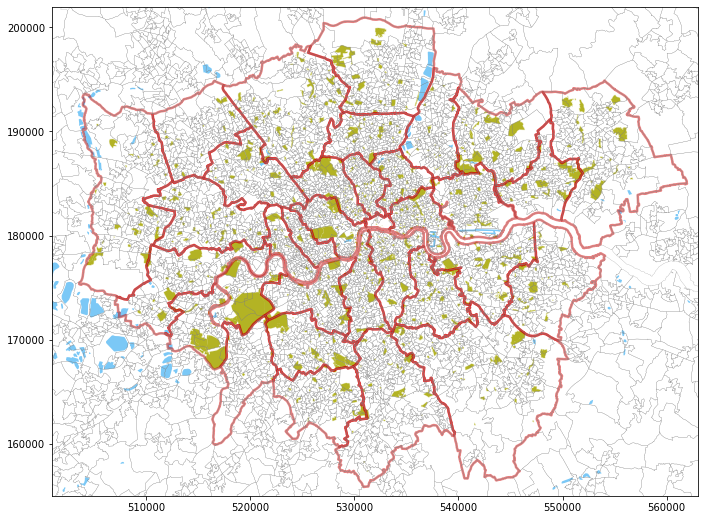

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

water.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
green.plot(edgecolor=(0.7, 0.7, 0.14, 0.25), facecolor=(0.7, 0.7, 0.14), ax=ax)
boros.plot(edgecolor=(0.8, 0, 0, 0.5), facecolor='none', linewidth=2.5, ax=ax)
lsoas.plot(edgecolor='grey', facecolor='none', linewidth=0.2, ax=ax)

ax.set_xlim(501000,563000)
ax.set_ylim(155000,202000)

In [15]:
boros

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,"MULTIPOLYGON (((516401.600 160201.800, 516407...."
1,Croydon,E09000008,8649.441,0.000,F,"MULTIPOLYGON (((535009.200 159504.700, 535005...."
2,Bromley,E09000006,15013.487,0.000,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."
3,Hounslow,E09000018,5658.541,60.755,F,"MULTIPOLYGON (((521975.800 178100.000, 521967...."
4,Ealing,E09000009,5554.428,0.000,F,"MULTIPOLYGON (((510253.500 182881.600, 510249...."
5,Havering,E09000016,11445.735,210.763,F,"MULTIPOLYGON (((549893.900 181459.800, 549894...."
6,Hillingdon,E09000017,11570.063,0.000,F,"MULTIPOLYGON (((510599.800 191689.500, 510615...."
7,Harrow,E09000015,5046.330,0.000,F,"MULTIPOLYGON (((510599.800 191689.500, 510660...."
8,Brent,E09000005,4323.270,0.000,F,"MULTIPOLYGON (((525201.000 182512.600, 525181...."
9,Barnet,E09000003,8674.837,0.000,F,"MULTIPOLYGON (((524579.900 198355.200, 524594...."


In [16]:
boros.NAME[25]

'Camden'

In [17]:
df = pd.read_csv('HampHS.csv', squeeze=True).to_dict()

In [18]:
df.keys()

dict_keys(['rates_code', 'location_code', 'name', 'address_no', 'address_street', 'address_town', 'pc__pcs', 'use_category', 'scat_code', 'sub_category', 'category', 'floor_area', 'rental_valuation', 'valuation_date', 'revaluation_year', 'period', 'rates_expected', 'rates_paid', 'status', 'status_date', 'status_duration', 'ratepayers_published'])

In [19]:
df['name'][2]

'NATIONAL CAR PARKS LIMITED'

In [20]:
df1 = pd.read_csv('HampHS.csv')

In [21]:
df1.head(5)

,rates_code,location_code,name,address_no,address_street,address_town,pc__pcs,use_category,scat_code,sub_category,...,rental_valuation,valuation_date,revaluation_year,period,rates_expected,rates_paid,status,status_date,status_duration,ratepayers_published
0,00184001B00002,25638063,NATIONAL CAR PARKS LIMITED,1B,DOWNSHIRE HILL,LONDON,NW3 1NR,"Surgeries, Clinics, Health Centres (Rental Val...",437,Other Public,...,137000,2010-04-01 00:00:00+00:00,2010,2010-06,56718.0,29687.43,False,01/04/2010,91.0,True
1,00184001B00002,25638063,NATIONAL CAR PARKS LIMITED,1B,DOWNSHIRE HILL,LONDON,NW3 1NR,"Surgeries, Clinics, Health Centres (Rental Val...",437,Other Public,...,137000,2010-04-01 00:00:00+00:00,2010,2010-09,56718.0,29687.43,False,01/04/2010,183.0,True
2,00184001B00002,25638063,NATIONAL CAR PARKS LIMITED,1B,DOWNSHIRE HILL,LONDON,NW3 1NR,"Surgeries, Clinics, Health Centres (Rental Val...",437,Other Public,...,137000,2010-04-01 00:00:00+00:00,2010,2010-12,56718.0,29687.43,False,01/04/2010,275.0,True
3,00184001B00002,25638063,NATIONAL CAR PARKS LIMITED,1B,DOWNSHIRE HILL,LONDON,NW3 1NR,"Surgeries, Clinics, Health Centres (Rental Val...",437,Other Public,...,137000,2010-04-01 00:00:00+00:00,2010,2011-03,56718.0,29687.43,False,01/04/2010,365.0,True
4,00184001B00002,25638063,NATIONAL CAR PARKS LIMITED,1B,DOWNSHIRE HILL,LONDON,NW3 1NR,"Surgeries, Clinics, Health Centres (Rental Val...",437,Other Public,...,137000,2010-04-01 00:00:00+00:00,2010,2011-06,59321.0,29687.43,False,01/04/2010,456.0,True


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3391 entries, 0 to 3390
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rates_code            3391 non-null   object 
 1   location_code         3391 non-null   int64  
 2   name                  2799 non-null   object 
 3   address_no            3391 non-null   object 
 4   address_street        3391 non-null   object 
 5   address_town          3391 non-null   object 
 6   pc__pcs               3391 non-null   object 
 7   use_category          3391 non-null   object 
 8   scat_code             3391 non-null   int64  
 9   sub_category          3391 non-null   object 
 10  category              3064 non-null   object 
 11  floor_area            3391 non-null   float64
 12  rental_valuation      3391 non-null   int64  
 13  valuation_date        3391 non-null   object 
 14  revaluation_year      3391 non-null   int64  
 15  period               

In [23]:
unique = df1.drop_duplicates(subset=['name'])

In [24]:
names = unique.name

In [25]:
list(names)

['NATIONAL CAR PARKS LIMITED',
 'CP PLUS LTD',
 'MYSTICAL FAIRIES LTD',
 'F. SALMON LIMITED',
 nan,
 'FEVZI LIMITED',
 'MAYFAIR JEWELLERS LIMITED',
 'PAUL UK LTD',
 'THE ORGANIC PHARMACY LTD',
 'SPACE NK LIMITED',
 'BASE FOODS LTD - IN LIQUIDATION',
 'RINALDO CLUB UK LIMITED',
 'EVERYTHING EVERYWHERE LTD',
 'GENERAL MILLS BERWICK LIMITED',
 'CANCER RESEARCH UK',
 'MAISON BLANC LTD',
 'MANISCO LIMITED',
 'NERO HOLDINGS LIMITED',
 'MOLTON BROWN LTD',
 'KIN YIP PROPERTIES LTD',
 'MAJE STORES LIMITED',
 'HI SUSHI (NORTH LONDON) LTD',
 'TZAR DESIGN & CONSTRUCT LIMITED',
 'CARPHONE WAREHOUSE LTD',
 'PIZZA EXPRESS (RESTAURANTS) LTD',
 'CALIFORNIA NAILS LTD',
 'VISION RHYTHM LTD',
 'BURGH HOUSE TRUST',
 'GINGER & WHITE LIMITED IN LIQUIDATION',
 'TAYLOR WIMPEY UK LIMITED',
 'FAQ CLOTHING LIMITED T/A QUESTION AIR IN',
 'FIROKA (KINGS CROSS) LTD',
 'GINGER & WHITE LIMITED',
 'J M WEINER (CHEMIST) LIMITED',
 'LLOYDS BANK PLC',
 'HAMPSTEAD AUDIO LIMITED',
 'AKY LIMITED',
 'CENTRAL PARK LTD',
 'THE 

In [26]:
subset = df1.drop(df1.iloc[:, 3:14], axis=1)

In [27]:
subset = subset.drop(subset.iloc[:, 5:7], axis=1)

In [28]:
subset

,rates_code,location_code,name,revaluation_year,period,status,status_date,status_duration,ratepayers_published
0,00184001B00002,25638063,NATIONAL CAR PARKS LIMITED,2010,2010-06,False,01/04/2010,91.0,True
1,00184001B00002,25638063,NATIONAL CAR PARKS LIMITED,2010,2010-09,False,01/04/2010,183.0,True
2,00184001B00002,25638063,NATIONAL CAR PARKS LIMITED,2010,2010-12,False,01/04/2010,275.0,True
3,00184001B00002,25638063,NATIONAL CAR PARKS LIMITED,2010,2011-03,False,01/04/2010,365.0,True
4,00184001B00002,25638063,NATIONAL CAR PARKS LIMITED,2010,2011-06,False,01/04/2010,456.0,True
...,...,...,...,...,...,...,...,...,...
3386,153002810056,10159244000,PROPJACK MANAGEMENT,2010,2014-03,True,30/06/2011,1006.0,True
3387,153002810056,10159244000,PROPJACK MANAGEMENT,2010,2014-06,True,30/06/2011,1097.0,True
3388,153002810056,10159244000,PROPJACK MANAGEMENT,2010,2014-09,True,30/06/2011,1189.0,True
3389,153002810056,10159244000,PROPJACK MANAGEMENT,2010,2014-12,True,30/06/2011,1281.0,True


***

## WHYTHWARK AND ADDRESS BASE PLUS DATASETS

In [29]:
ABP = pd.read_csv("AddressBasePlus-Camden-Complete.csv", low_memory = False)

In [30]:
WHY = pd.read_csv("Whythawk-Camden-Combined.csv")

In [ ]:
WHY

In [31]:
ABP['location_code'] = ABP['V49']

In [32]:
ABPWHY = pd.merge(WHY, ABP, on ='location_code')

In [33]:
ABPWHY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429532 entries, 0 to 429531
Columns: 102 entries, rates_code to V77
dtypes: bool(2), float64(36), int64(11), object(53)
memory usage: 331.8+ MB


In [34]:
ABPWHY.head()

,rates_code,rates_authority_id,rates_authority,region,location_code,address_no,address_street,address_town,pc__pcs,use_category,...,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77
0,00000020101013,E09000007,Camden,Inner London - West,3574848000,213,EVERSHOLT STREET,LONDON,NW1 1DE,Shops,...,1L,D,NaN,E05000143,NaN,2012-03-19,0,CS,249.0,NaN
1,00000020101013,E09000007,Camden,Inner London - West,3574848000,213,EVERSHOLT STREET,LONDON,NW1 1DE,Shops,...,1L,D,NaN,E05000143,NaN,2012-03-19,0,CS,249.0,NaN
2,00000020101013,E09000007,Camden,Inner London - West,3574848000,213,EVERSHOLT STREET,LONDON,NW1 1DE,Shops,...,1L,D,NaN,E05000143,NaN,2012-03-19,0,CS,249.0,NaN
3,00000020101013,E09000007,Camden,Inner London - West,3574848000,213,EVERSHOLT STREET,LONDON,NW1 1DE,Shops,...,1L,D,NaN,E05000143,NaN,2012-03-19,0,CS,249.0,NaN
4,00000020101013,E09000007,Camden,Inner London - West,3574848000,213,EVERSHOLT STREET,LONDON,NW1 1DE,Shops,...,1L,D,NaN,E05000143,NaN,2012-03-19,0,CS,249.0,NaN


In [35]:
#ABPWHY.to_csv('COMBINED ABPWHY.csv')

In [36]:
GLA = gpd.read_file("https://data.london.gov.uk/download/gla-high-street-boundaries/166e8e42-c1ea-42ec-bd1d-99dc29d04fa8/GLA_High_Street_boundaries.gpkg")

<AxesSubplot:>

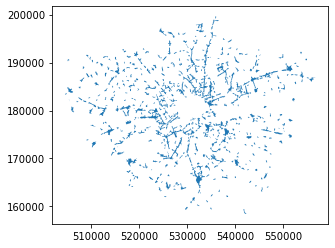

In [37]:
GLA.plot()

In [38]:
GLA.to_csv("GLA HS boundaries.csv")

In [39]:
GLA.head()

,objectid,highstreet_id,highstreet_name,area_ha,gdb_geomattr_data,geometry
0,1,1,"Pimlico Road, Belgravia",10.564859,None,"POLYGON ((528532.653 178503.913, 528533.610 17..."
1,2,2,"Queensway, Westbourne Grove, Bayswater",31.812834,None,"POLYGON ((525909.685 181229.993, 525902.809 18..."
2,3,3,"Carshalton Road, Carshalton.",4.462210,None,"POLYGON ((527372.837 164353.214, 527376.960 16..."
3,4,4,"Mitcham Road, Croydon.",6.936039,None,"POLYGON ((531381.957 166498.580, 531386.088 16..."
4,5,5,"Bridge Road, Chessington.",4.907169,None,"POLYGON ((518643.379 164208.685, 518642.422 16..."


In [40]:
boros.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,"MULTIPOLYGON (((516401.600 160201.800, 516407...."
1,Croydon,E09000008,8649.441,0.000,F,"MULTIPOLYGON (((535009.200 159504.700, 535005...."
2,Bromley,E09000006,15013.487,0.000,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."
3,Hounslow,E09000018,5658.541,60.755,F,"MULTIPOLYGON (((521975.800 178100.000, 521967...."
4,Ealing,E09000009,5554.428,0.000,F,"MULTIPOLYGON (((510253.500 182881.600, 510249...."


In [41]:
Camden = boros[boros["NAME"]=="Camden"]

<AxesSubplot:>

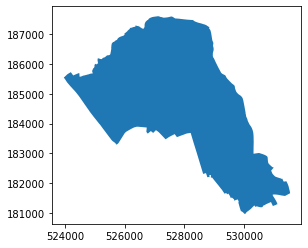

In [42]:
Camden.plot()

In [43]:
CamHS = gpd.clip(GLA, Camden)

<AxesSubplot:>

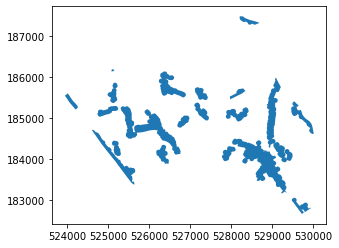

In [44]:
CamHS.plot()

In [45]:
CamHS

,objectid,highstreet_id,highstreet_name,area_ha,gdb_geomattr_data,geometry
97,97,97,Brecknock Road & York Way.,15.327961,None,"POLYGON ((529626.963 185290.470, 529619.385 18..."
98,98,98,Kentish Town Road.,11.453950,None,"POLYGON ((529169.048 184315.559, 529169.180 18..."
291,285,285,"Fortress Road, Tufnell Park.",28.325719,None,"POLYGON ((529209.157 185757.682, 529206.506 18..."
293,287,287,Camden Town HS,56.349258,None,"POLYGON ((528129.528 184489.100, 528138.350 18..."
310,303,303,"Belsize Lane, Belsize Park.",5.069615,None,"POLYGON ((526892.645 185059.806, 526900.890 18..."
311,304,304,"Loudoun Road, South Hampstead.",8.078871,None,"POLYGON ((526350.252 184351.109, 526360.006 18..."
313,306,306,"Haverstock Hill, Belsize Park.",7.074332,None,"POLYGON ((527238.261 185262.468, 527237.189 18..."
314,307,307,"South End Road, Hampstead.",6.131431,None,"POLYGON ((527231.814 185728.745, 527232.663 18..."
326,319,319,"Highgate High Street, Highgate.",8.723256,None,"POLYGON ((528678.473 187328.037, 528676.686 18..."
329,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,"POLYGON ((524019.997 185605.672, 524022.679 18..."


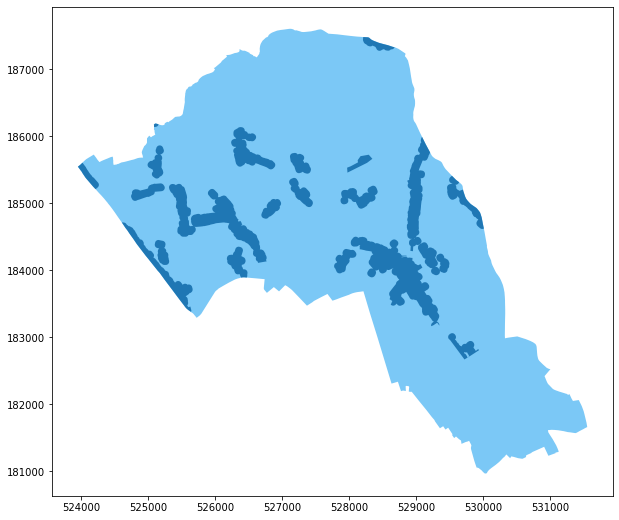

In [46]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Camden.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
CamHS.plot(ax=ax)
fig.savefig('highstreets-camden.jpg')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  """


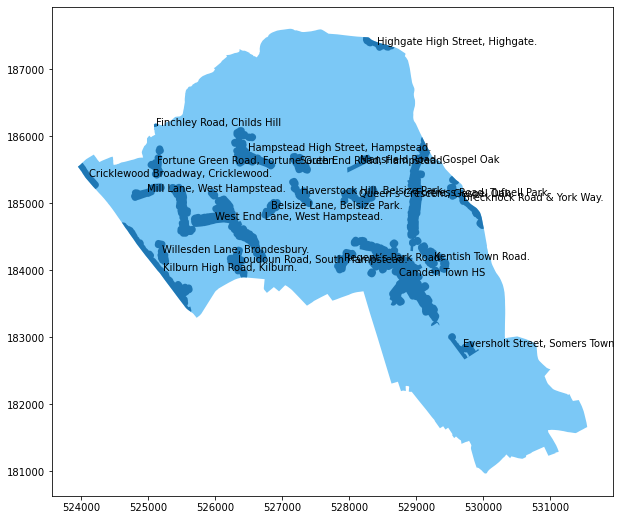

In [47]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Camden.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
CamHS.plot(ax=ax)
CamHS.apply(lambda x: ax.annotate(s=x.highstreet_name, xy=x.geometry.centroid.coords[0], ha='left'), axis=1);

# textcoords  ;;;; 'offset pixels'	Offset (in pixels) from the xy value

In [48]:
#CamHS.to_csv("Camden Highstreets.csv")

***

In [49]:
WHY.head()

,rates_code,rates_authority_id,rates_authority,region,location_code,address_no,address_street,address_town,pc__pcs,use_category,...,valuation_date,revaluation_year,period,rates_expected,name,rates_paid,status,status_date,status_duration,ratepayers_published
0,00000020101013,E09000007,Camden,Inner London - West,3574848000,213,EVERSHOLT STREET,LONDON,NW1 1DE,Shops,...,2010-04-01 00:00:00+00:00,2010,2010-06,2075.70,LBC - HP010CE020,0.00,False,2010-04-01,91.0,True
1,00000031081012,E09000007,Camden,Inner London - West,112634063,GND F 88,BELSIZE LANE,LONDON,NW3 5BE,Offices (Inc Computer Centres),...,2009-11-16 00:00:00+00:00,2010,2010-06,4070.00,ADMIRAL PROPERTY PARTNERSHIP LTD,1700.48,True,2010-04-01,91.0,True
2,0000003430100B,E09000007,Camden,Inner London - West,97750063,BST & GND FS N 2,BLEEDING HEART YARD,LONDON,EC1N 8SJ,"Factories, Workshops and Warehouses (Incl Bake...",...,2010-04-01 00:00:00+00:00,2010,2010-06,4171.75,RYOHIN KEIKAKU EUROPE LTD,NaN,True,2010-04-01,91.0,True
3,00000034302003,E09000007,Camden,Inner London - West,97751063,GND FS S 2,BLEEDING HEART YARD,LONDON,EC1N 8SJ,"Factories, Workshops and Warehouses (Incl Bake...",...,2010-04-01 00:00:00+00:00,2010,2010-06,10989.00,S J TANNER ESQ,4440.44,True,2010-04-01,91.0,True
4,00000035755017,E09000007,Camden,Inner London - West,98284063,GND F 102,BOUNDARY ROAD,LONDON,NW8 0RH,"Surgeries, Clinics, Health Centres (Rental Val...",...,2010-04-01 00:00:00+00:00,2010,2010-06,5698.00,E BARAN DENTAL LTD - IN LIQUIDATION,4202.12,True,2010-04-01,91.0,True


In [50]:
ABPWHY2 = pd.merge(WHY, ABP, how= "left", on ='location_code')

In [51]:
ABPWHY2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566018 entries, 0 to 566017
Columns: 102 entries, rates_code to V77
dtypes: bool(2), float64(44), int64(3), object(53)
memory usage: 437.2+ MB


In [52]:
ABPWHY.head()

,rates_code,rates_authority_id,rates_authority,region,location_code,address_no,address_street,address_town,pc__pcs,use_category,...,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77
0,00000020101013,E09000007,Camden,Inner London - West,3574848000,213,EVERSHOLT STREET,LONDON,NW1 1DE,Shops,...,1L,D,NaN,E05000143,NaN,2012-03-19,0,CS,249.0,NaN
1,00000020101013,E09000007,Camden,Inner London - West,3574848000,213,EVERSHOLT STREET,LONDON,NW1 1DE,Shops,...,1L,D,NaN,E05000143,NaN,2012-03-19,0,CS,249.0,NaN
2,00000020101013,E09000007,Camden,Inner London - West,3574848000,213,EVERSHOLT STREET,LONDON,NW1 1DE,Shops,...,1L,D,NaN,E05000143,NaN,2012-03-19,0,CS,249.0,NaN
3,00000020101013,E09000007,Camden,Inner London - West,3574848000,213,EVERSHOLT STREET,LONDON,NW1 1DE,Shops,...,1L,D,NaN,E05000143,NaN,2012-03-19,0,CS,249.0,NaN
4,00000020101013,E09000007,Camden,Inner London - West,3574848000,213,EVERSHOLT STREET,LONDON,NW1 1DE,Shops,...,1L,D,NaN,E05000143,NaN,2012-03-19,0,CS,249.0,NaN


In [53]:
ABPWHY.V10.head()

0    51.532864
1    51.532864
2    51.532864
3    51.532864
4    51.532864
Name: V10, dtype: float64

In [54]:
ABPWHY.V11.head()

0   -0.137136
1   -0.137136
2   -0.137136
3   -0.137136
4   -0.137136
Name: V11, dtype: float64

In [55]:
CAMDEN = gpd.GeoDataFrame(ABPWHY, geometry = gpd.points_from_xy(ABPWHY['V11'], ABPWHY['V10'], crs="epsg:4326"))

In [56]:
del ABPWHY
del ABP
del WHY

In [57]:
CAMDEN.head()

,rates_code,rates_authority_id,rates_authority,region,location_code,address_no,address_street,address_town,pc__pcs,use_category,...,V69,V70,V71,V72,V73,V74,V75,V76,V77,geometry
0,00000020101013,E09000007,Camden,Inner London - West,3574848000,213,EVERSHOLT STREET,LONDON,NW1 1DE,Shops,...,D,NaN,E05000143,NaN,2012-03-19,0,CS,249.0,NaN,POINT (-0.13714 51.53286)
1,00000020101013,E09000007,Camden,Inner London - West,3574848000,213,EVERSHOLT STREET,LONDON,NW1 1DE,Shops,...,D,NaN,E05000143,NaN,2012-03-19,0,CS,249.0,NaN,POINT (-0.13714 51.53286)
2,00000020101013,E09000007,Camden,Inner London - West,3574848000,213,EVERSHOLT STREET,LONDON,NW1 1DE,Shops,...,D,NaN,E05000143,NaN,2012-03-19,0,CS,249.0,NaN,POINT (-0.13714 51.53286)
3,00000020101013,E09000007,Camden,Inner London - West,3574848000,213,EVERSHOLT STREET,LONDON,NW1 1DE,Shops,...,D,NaN,E05000143,NaN,2012-03-19,0,CS,249.0,NaN,POINT (-0.13714 51.53286)
4,00000020101013,E09000007,Camden,Inner London - West,3574848000,213,EVERSHOLT STREET,LONDON,NW1 1DE,Shops,...,D,NaN,E05000143,NaN,2012-03-19,0,CS,249.0,NaN,POINT (-0.13714 51.53286)


<AxesSubplot:>

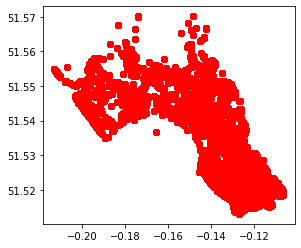

In [58]:
CAMDEN.plot(color= "red")

In [59]:
CAMDEN = CAMDEN.to_crs("EPSG:27700")

In [60]:
CAMDEN.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<AxesSubplot:>

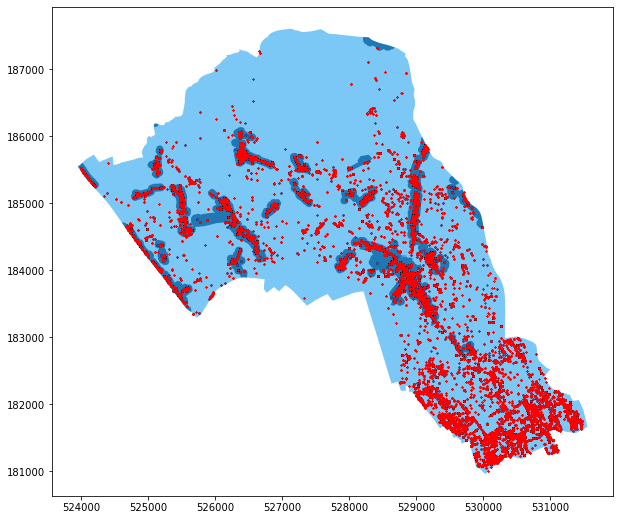

In [61]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Camden.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
CamHS.plot(ax=ax)
CAMDEN.plot(color= "red", markersize=0.2, ax=ax)

In [62]:
#CAMDEN.to_csv("ABPWHY-final.csv")

In [63]:
CamHS.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21 entries, 97 to 584
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   objectid           21 non-null     int64   
 1   highstreet_id      21 non-null     int64   
 2   highstreet_name    21 non-null     object  
 3   area_ha            21 non-null     float64 
 4   gdb_geomattr_data  0 non-null      object  
 5   geometry           21 non-null     geometry
dtypes: float64(1), geometry(1), int64(2), object(2)
memory usage: 1.1+ KB


In [64]:
CamHS.iloc[-2]

objectid                                                           554
highstreet_id                                                      554
highstreet_name                      Hampstead High Street, Hampstead.
area_ha                                                        18.0157
gdb_geomattr_data                                                 None
geometry             POLYGON ((526487.2021000003 186045.8541000001,...
Name: 573, dtype: object

In [65]:
hamp = CamHS[CamHS.objectid == 554]

<AxesSubplot:>

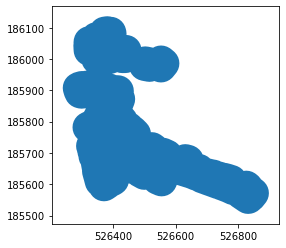

In [66]:
hamp.plot()

In [67]:
sample = CAMDEN.sample(n=200)

In [68]:
hamp1 = gpd.clip(sample, hamp)

<AxesSubplot:>

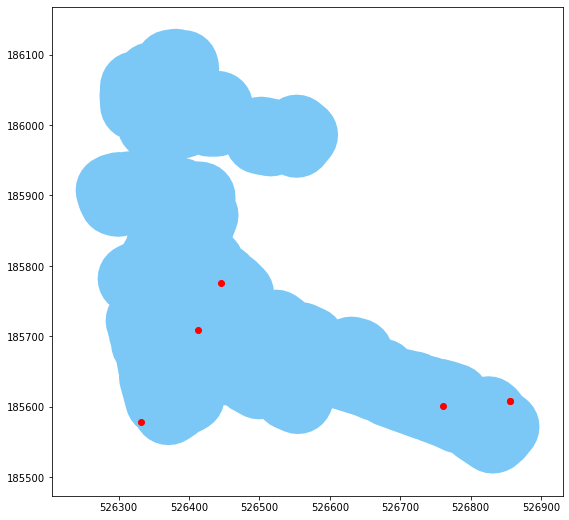

In [69]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

hamp.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
hamp1.plot(color="red", ax=ax)

In [70]:
hamp2 = gpd.sjoin(sample, hamp, op= 'within')

<AxesSubplot:>

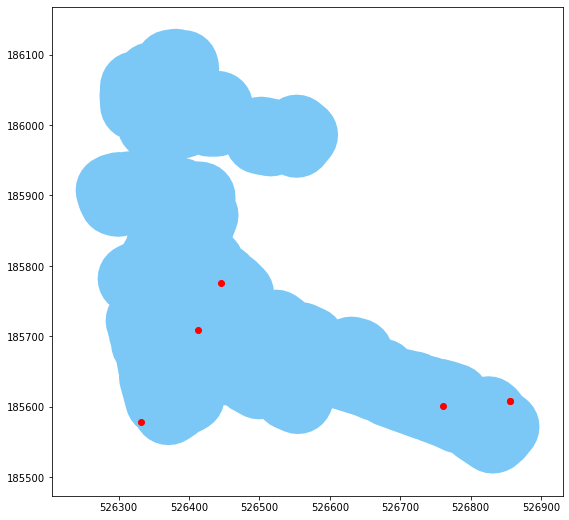

In [71]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

hamp.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
hamp2.plot(color="red", ax=ax)

In [72]:
plswork = gpd.clip(CAMDEN, CamHS)

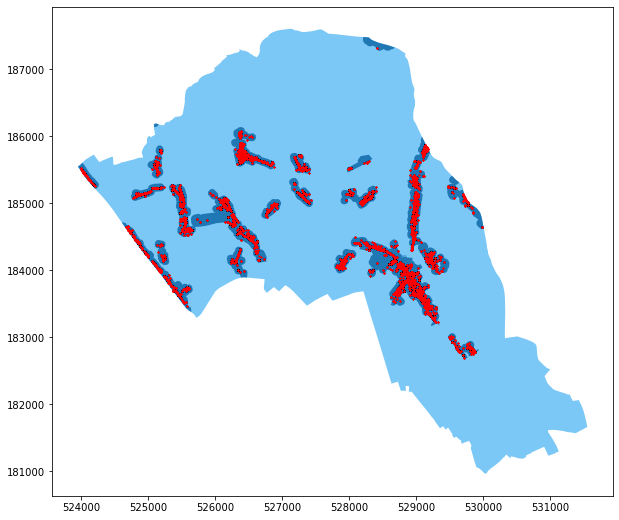

In [73]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Camden.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
CamHS.plot(ax=ax)
plswork.plot(color= "red", markersize=0.2, ax=ax)
fig.savefig("camden-hs-and-point.jpg")

In [74]:
#plswork.to_file('all-camden-hs.geojson', driver ="GeoJSON")

In [75]:
#plswork.to_file("camden-hs-points.gpkg", layer='plswork', driver="GPKG")

In [76]:
#plswork.to_file("camden-hs-points.shp")

In [77]:
#plswork.to_csv("highsteets of camden.csv")

In [78]:
#Camden.to_file("camden-boro.shp")

In [79]:
#CamHS.to_file("camden-hs.shp")

In [80]:
#plswork.to_file("camden-hs-points.shp")

In [ ]:
hamp1 = gpd.clip(plswork, hamp)

<AxesSubplot:>

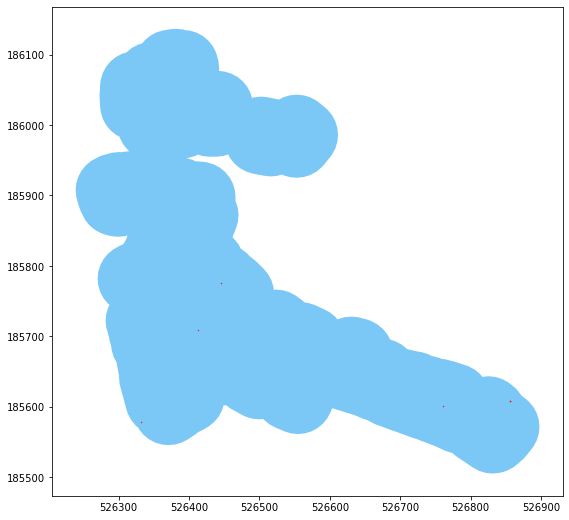

In [82]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

hamp.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
hamp1.plot(color= "red", markersize=0.2, ax=ax)

In [83]:
#hamp1.to_csv("Hampsted HS python.csv")

In [84]:
#buildings = gpd.read_file("greater-london-latest-free.shp/gis_osm_buildings_a_free_1.shp")

In [85]:
#buildings = buildings.to_crs("EPSG:27700")

In [ ]:
#hampB = gpd.clip(buildings, hamp)

***

### Extracting the geographies of each Camden HS

In [ ]:
CamHS

In [ ]:
CamHS.iloc[97]['highstreet_name']

In [ ]:
for i in CamHS['highstreet_id']:
    name = CamHS.loc[i, 